In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as sps
from tqdm import tqdm
import math
from random import sample 
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
import warnings
import ast
import pandas as pd
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pickle
warnings.filterwarnings("ignore")

import ast
ast.literal_eval

import sys
sys.path.append('./models/')
import pernir_model
import pernir_metrics
import pretty_plotter

### 1. Instacart

In [2]:
train_baskets = pd.read_csv('../data/instacart/train_baskets.csv')
test_samples = pd.read_csv('../data/instacart/test_sample_to_predict_instacart.csv')

In [10]:
model = pernir_model.Collab(train_baskets,test_samples, train_url = '../data/instacart/user_sim.pickle')
print('train...')
model.train()
print('predict...')

train...
predict...


In [11]:
def get_predictions(row):
    return model.predict(row['user_id'], eval(row['masked_basket']))

test_samples['pred'] = test_samples.apply(lambda row: get_predictions(row), axis=1)

In [12]:
test_samples.head(2)

,basket_id,user_id,full_basket,masked_items,masked_basket,num_to_mask,pred
0,282,8456,"[2727, 21338, 23767, 43892]",[43892],"[2727, 21338, 23767]",1,"[26338, 2727, 30285, 4105, 15424, 1352, 18800,..."
1,1016,26337,"[38152, 12916, 36126, 32175]",[32175],"[38152, 12916, 36126]",1,"[38152, 7076, 36126, 32175, 4210, 12916, 18418..."


In [6]:
pernir_metrics.calculate_and_save_precision_recall(test_samples)

In [7]:
pernir_metrics.calculate_and_save_ndcg(test_samples)

In [8]:
test_samples.head(2)

,basket_id,user_id,full_basket,masked_items,masked_basket,num_to_mask,pred,precision@1,recall@1,precision@2,...,ndcg@11,ndcg@12,ndcg@13,ndcg@14,ndcg@15,ndcg@16,ndcg@17,ndcg@18,ndcg@19,ndcg@20
0,282,8456,"[2727, 21338, 23767, 43892]",[43892],"[2727, 21338, 23767]",1,"[26338, 2727, 30285, 4105, 15424, 1352, 18800,...",0.75,0.75,0.75,...,0.630930,0.630930,0.630930,0.630930,0.630930,0.630930,0.630930,0.630930,0.630930,0.630930
1,1016,26337,"[38152, 12916, 36126, 32175]",[32175],"[38152, 12916, 36126]",1,"[38152, 7076, 36126, 32175, 4210, 12916, 18418...",1.00,0.75,0.75,...,0.892754,0.892754,0.892754,0.892754,0.892754,0.892754,0.892754,0.892754,0.892754,0.892754


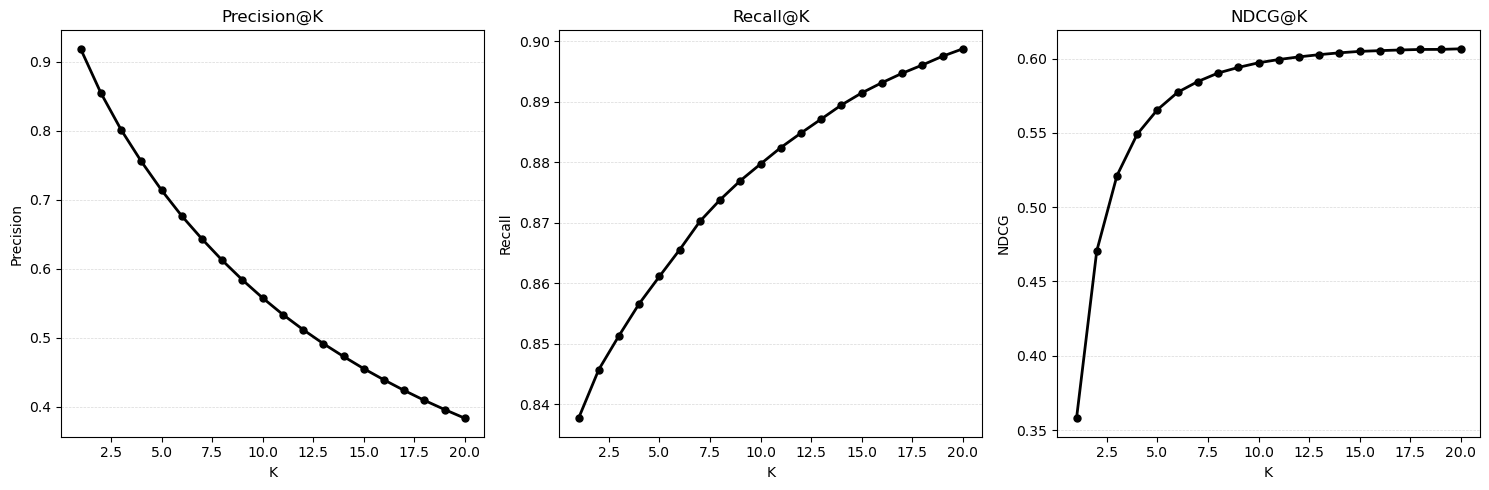

In [9]:
pretty_plotter.plot_pretty_metrics_pernir(test_samples)

## 2. Ta Feng

In [33]:
train_baskets = pd.read_csv('../data/ta_feng/train_baskets.csv').drop('index', axis = 1)
test_samples = pd.read_csv('../data/ta_feng/test_sample_to_predict_ta_feng.csv')

In [35]:
model = pernir_model.Collab(train_baskets,test_samples, train_url = '../data/ta_feng/user_sim.pickle')
print('train...')
model.train()
print('predict...')

train...
predict...


In [36]:
def get_predictions(row):
    return model.predict(row['user_id'], eval(row['masked_basket']))

test_samples['pred'] = test_samples.apply(lambda row: get_predictions(row), axis=1)

In [38]:
# there are baskets with 0 predictions
test_samples = test_samples[test_samples.pred.apply(lambda x: len(x)) > 0]

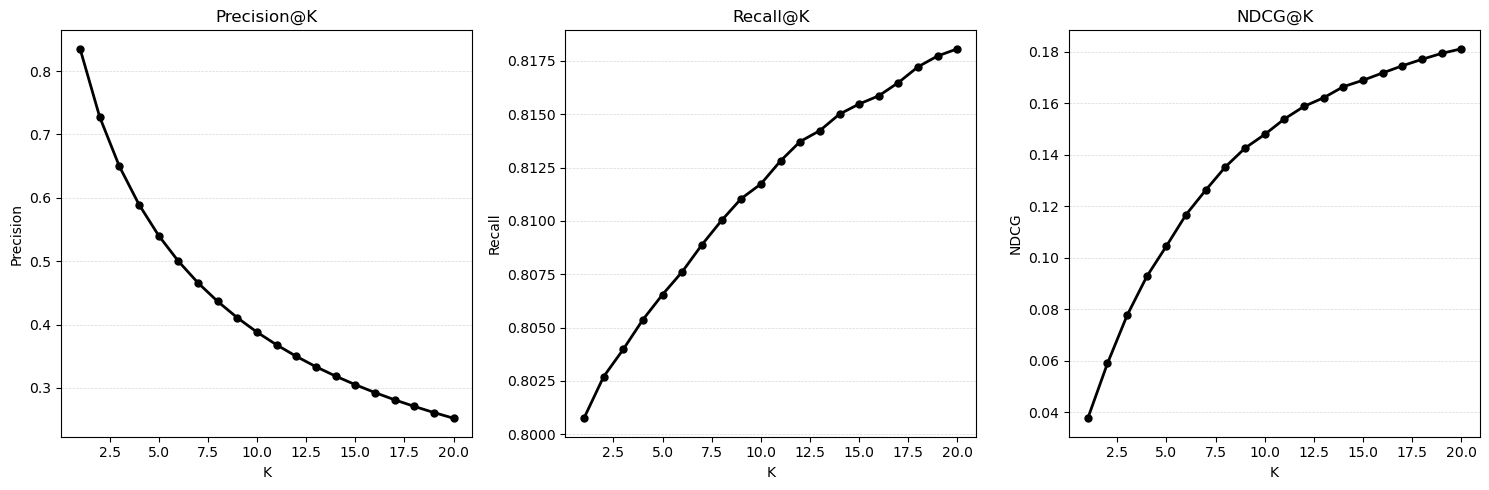

In [39]:
pernir_metrics.calculate_and_save_precision_recall(test_samples)
pernir_metrics.calculate_and_save_ndcg(test_samples)
pretty_plotter.plot_pretty_metrics_pernir(test_samples)

## 3. Dunnhubpy

In [15]:
train_baskets = pd.read_csv('../data/dunnhumby/train_baskets.csv').drop('index', axis = 1)
test_samples = pd.read_csv('../data/dunnhumby/test_sample_to_predict_dunnhumby.csv')

In [16]:
model = pernir_model.Collab(train_baskets,test_samples, train_url = '../data/dunnhumby/user_sim.pickle')
print('train...')
model.train()
print('predict...')

train...
predict...


In [17]:
def get_predictions(row):
    return model.predict(row['user_id'], eval(row['masked_basket']))

test_samples['pred'] = test_samples.apply(lambda row: get_predictions(row), axis=1)

In [21]:
# there are baskets with 0 predictions
test_samples = test_samples[test_samples.pred.apply(lambda x: len(x)) > 0]

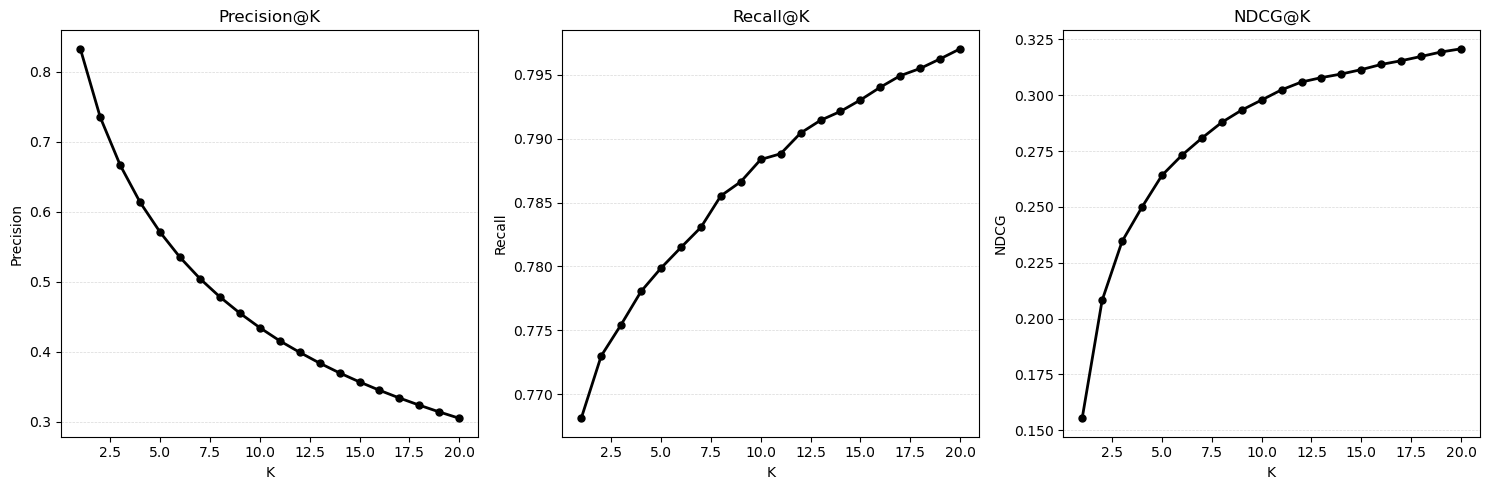

In [22]:
pernir_metrics.calculate_and_save_precision_recall(test_samples)
pernir_metrics.calculate_and_save_ndcg(test_samples)
pretty_plotter.plot_pretty_metrics_pernir(test_samples)